In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Background

I know how to integrate functions of the form

$$
f(\phi, x, y, z) = \sin\left(\frac{\phi}{2}\right)^x \cos\left(\frac{\phi}{2}\right)^y \left(1 - \cos\left(\frac{\phi}{2}\right)\right)^z
$$

where $x$, $y$, and $z$ are any real numbers.

I need to integrate

$$
g(\lambda, x', y') = \sin\left(\frac{\lambda}{2}\right)^{x'} \cos\left(\frac{\lambda}{2}\right)^{y'}
$$

where 

$$
\lambda = \lambda(\phi, c) = c \sin^2\phi.
$$

### Problem
Can I find a function $\lambda'(\phi, c)$ that approximates $\lambda(\phi, c)$ for which I may write

$$
g(\lambda', x', y') = \sum_i a_i f(\phi, x_i, y_i, z_i)
$$

so that I can easily integrate it?

In [58]:
def lag(phi, amp):
    return -amp * np.sin(phi) ** 2

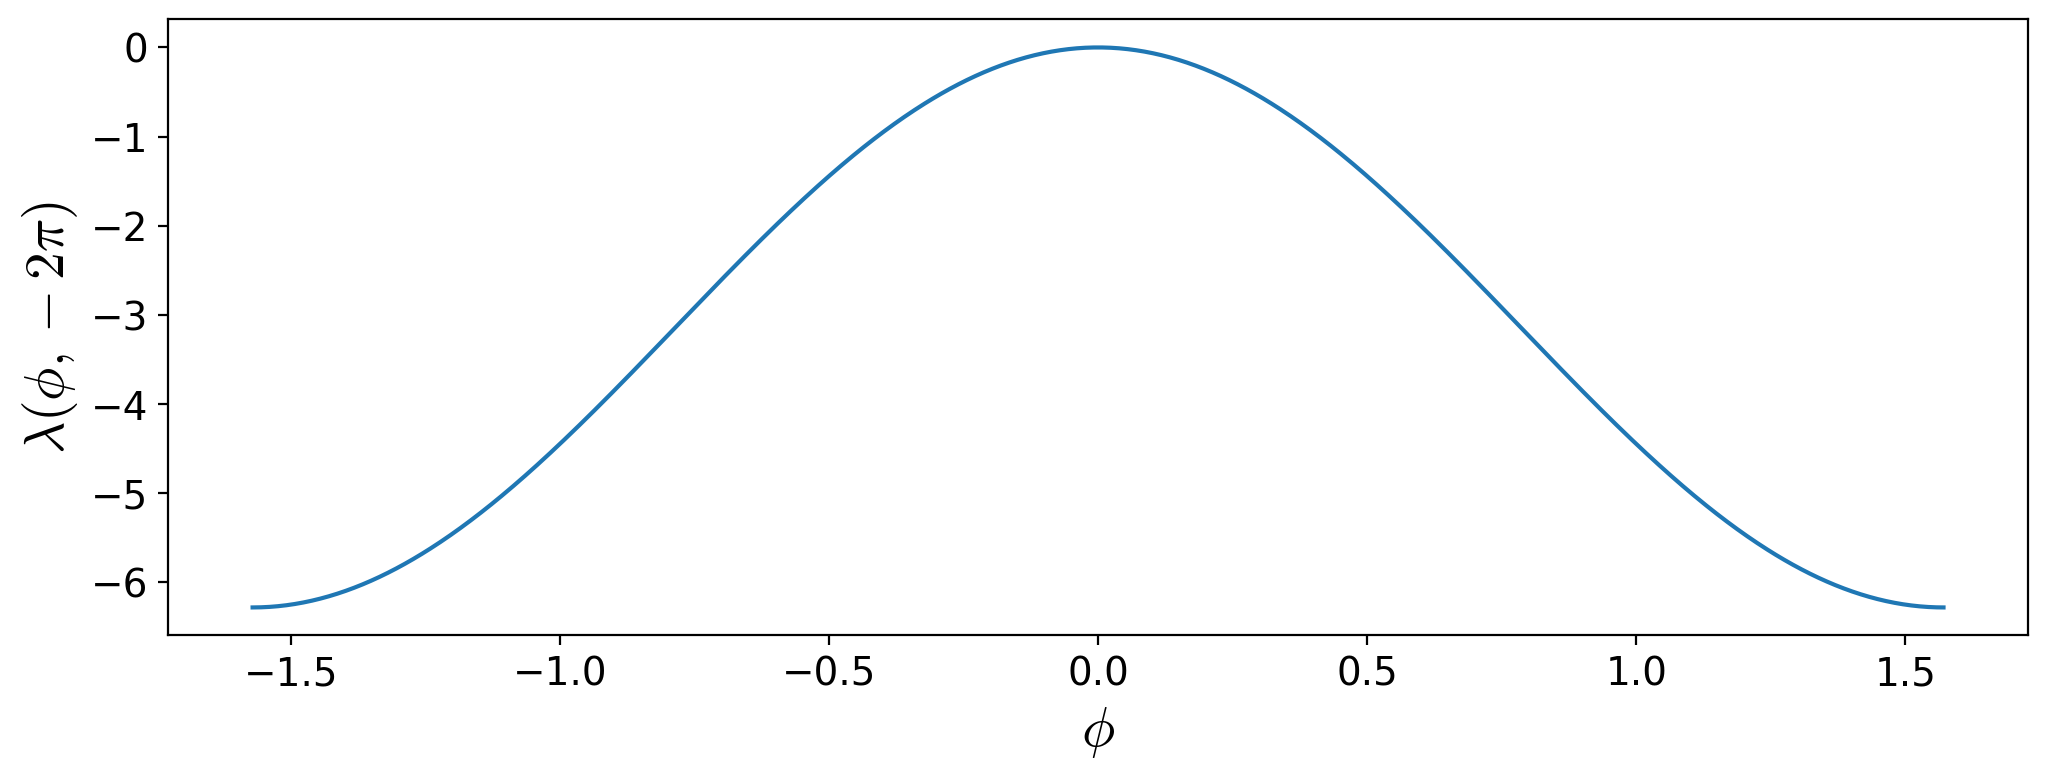

In [147]:
phi = np.linspace(-np.pi / 2, np.pi / 2, 1000)
plt.plot(phi, lag(phi, amp=2 * np.pi));
plt.xlabel(r"$\phi$", fontsize=20);
plt.ylabel(r"$\lambda(\phi, -2\pi)$", fontsize=20);

In [292]:
phi = np.linspace(-np.pi / 2, np.pi / 2, 1000)
c = 1 - np.cos(phi)
A = np.vander(c, 10, increasing=True)

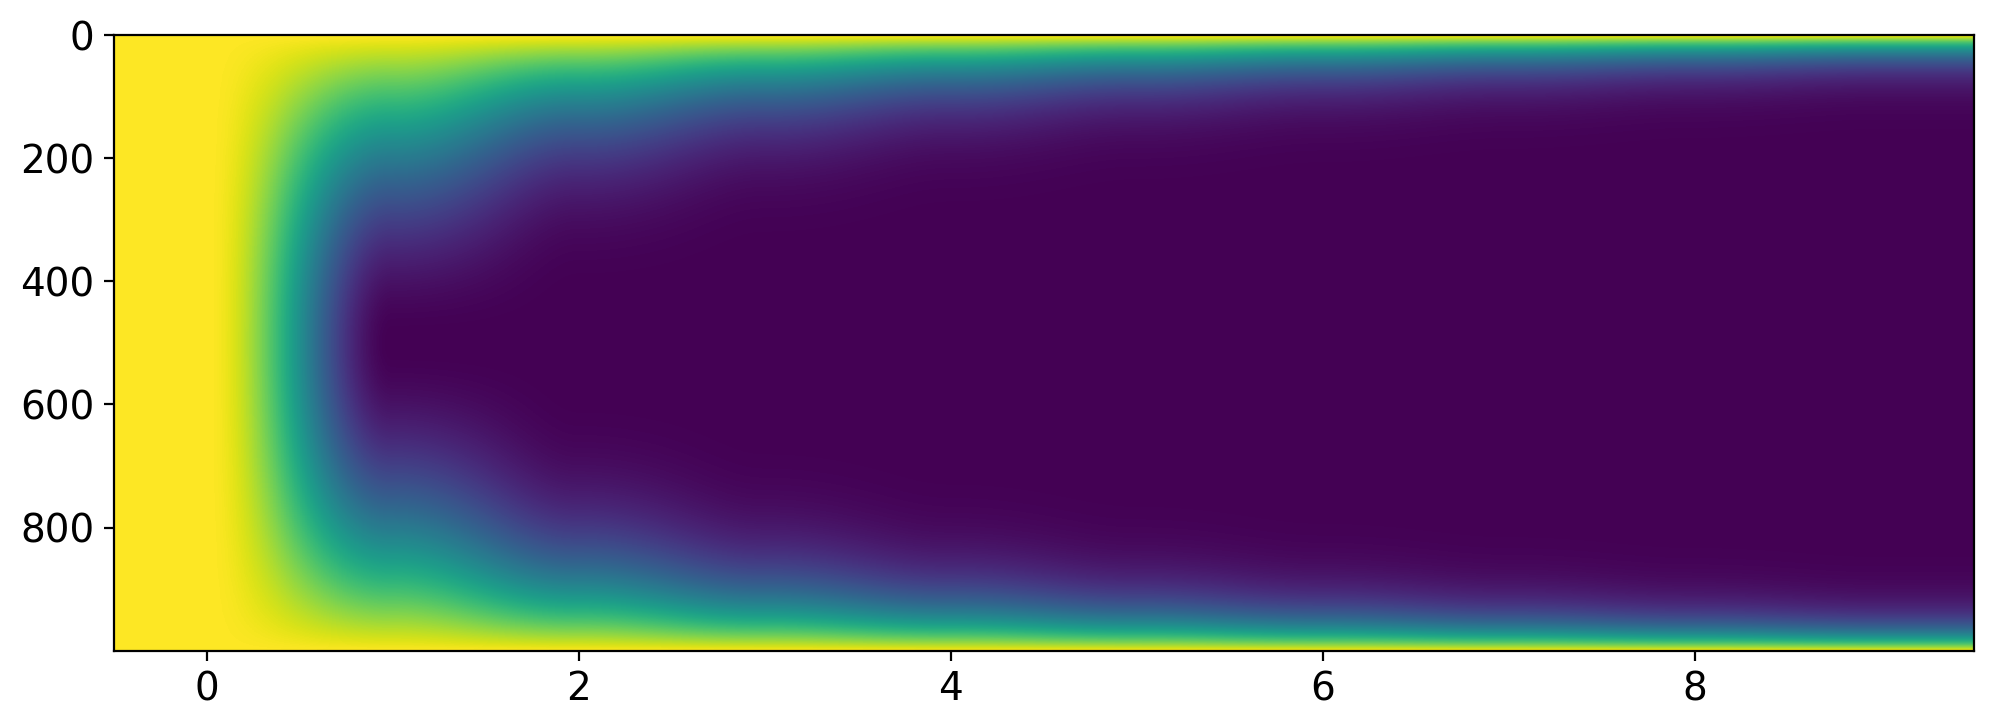

In [293]:
plt.imshow(A, aspect="auto")

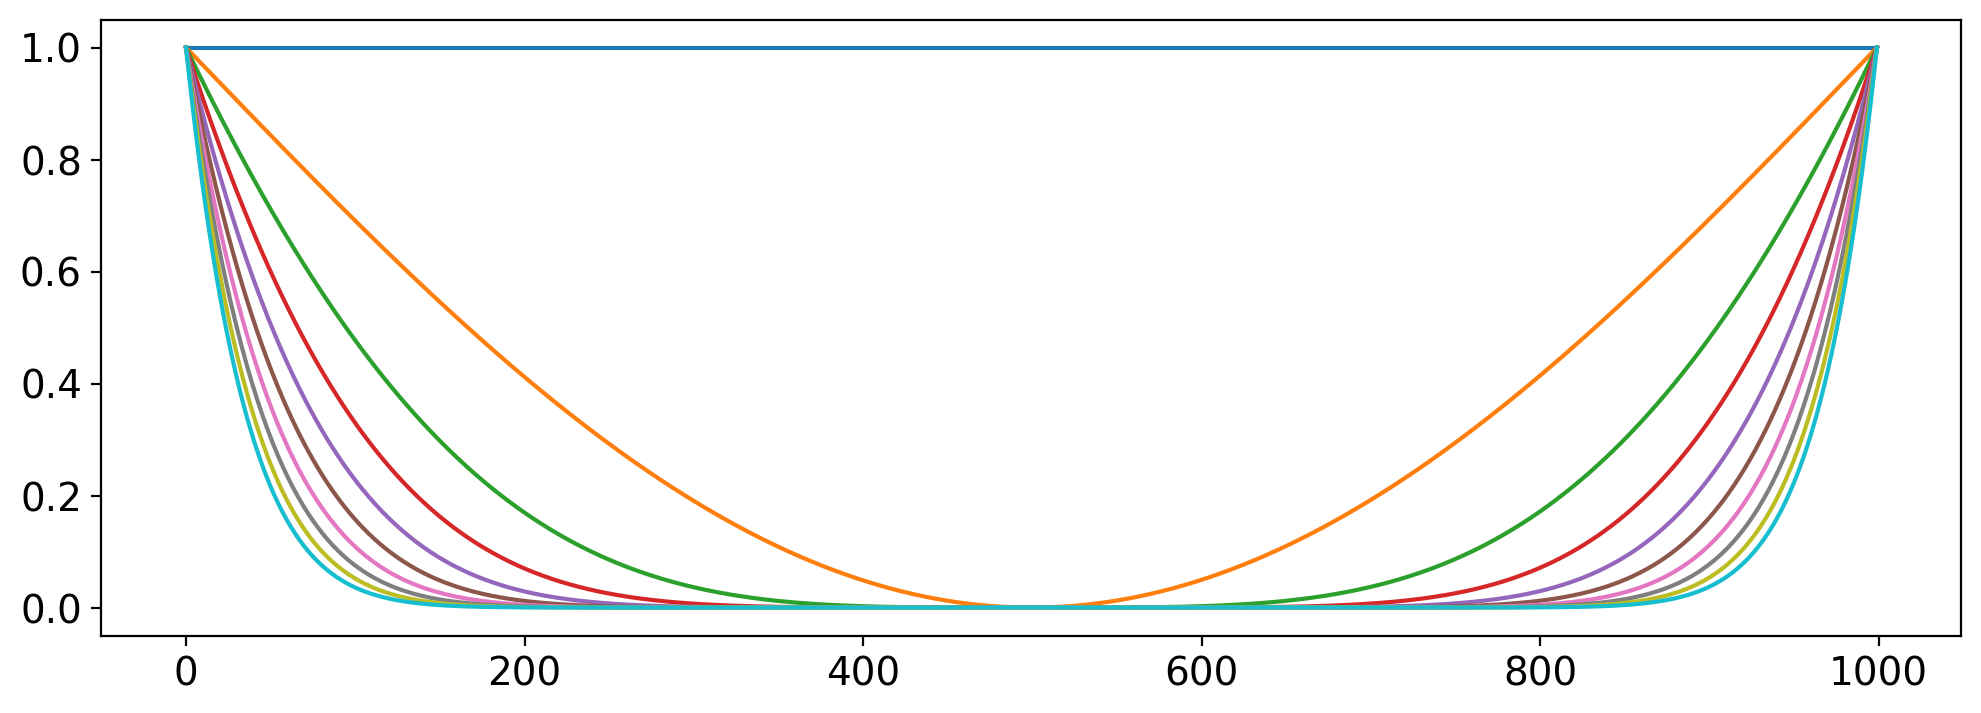

In [294]:
[plt.plot(A[:, k]) for k in range(10)];

In [328]:
p = lag(phi, 30 * np.pi)
sinp = np.sin(p)
cosp = np.cos(p)

In [329]:
np.linalg.matrix_rank(A.T @ A)

10

[-5.04414278e-01  3.12629416e+01 -6.15039715e+02  5.55216773e+03
 -2.69157873e+04  7.56192802e+04 -1.26578198e+05  1.24189508e+05
 -6.57851879e+04  1.45022548e+04]
0.6502118910526465


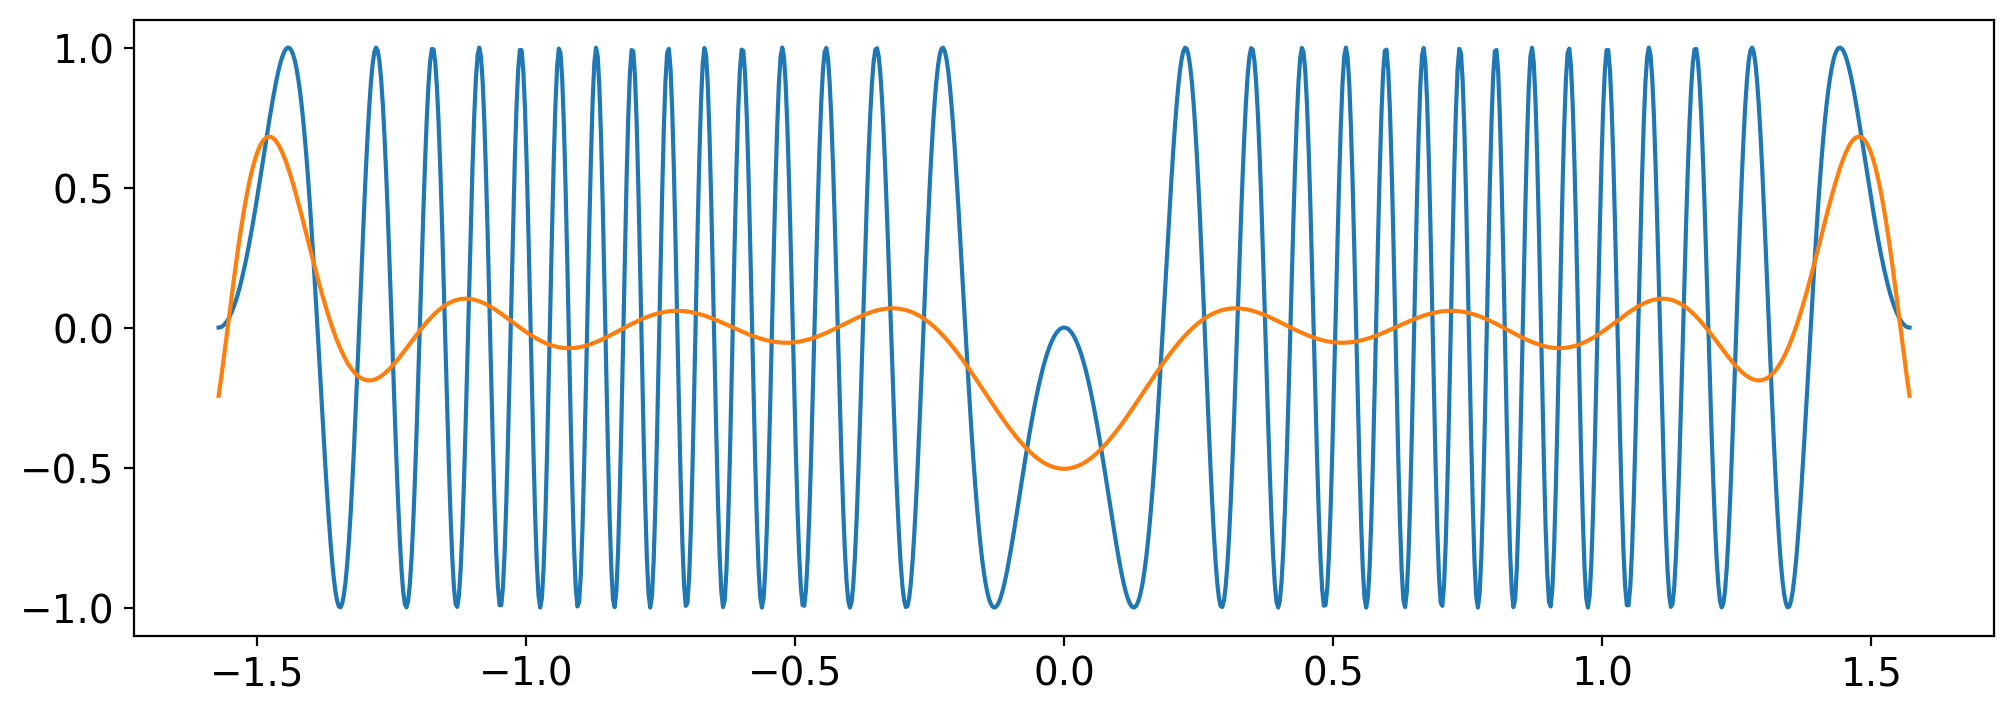

In [330]:
plt.plot(phi, sinp)
w = np.linalg.solve(A.T @ A + 1e-12 * np.eye(A.shape[1]), A.T @ sinp)
plt.plot(phi, A @ w)
print(w)
print(np.std(sinp - A @ w))

[ 1.00006850e+00 -5.97592898e-02 -7.49291488e+01 -8.72928444e+00
  1.91316368e+03 -7.04915934e+03  1.19292285e+04 -1.09264781e+04
  5.27382550e+03 -1.05686551e+03]
0.0006668486730625815


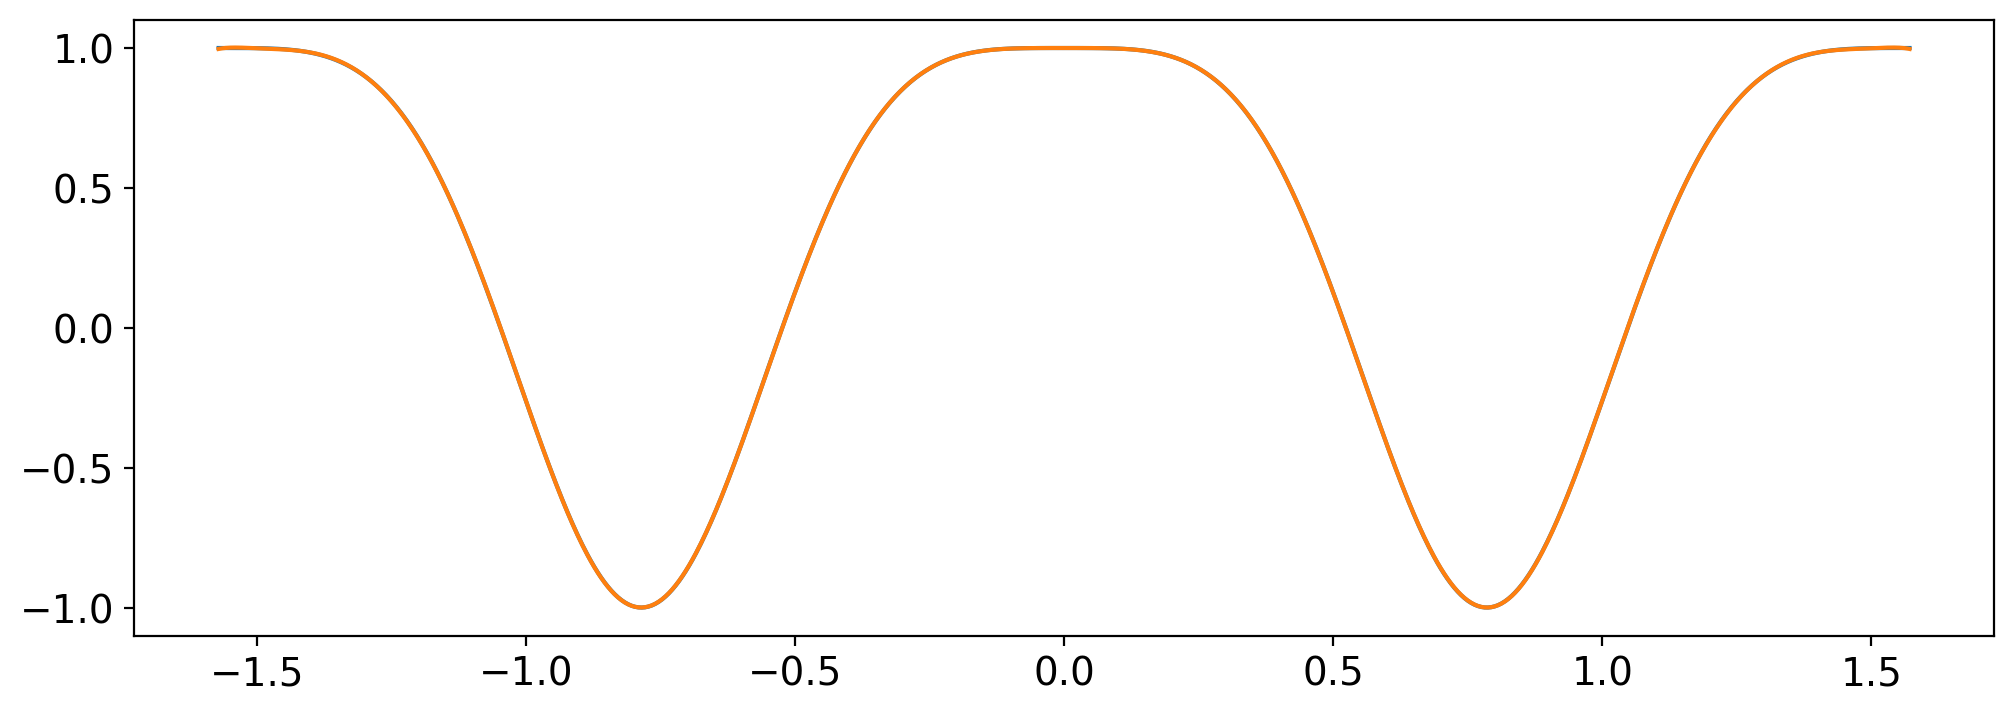

In [310]:
plt.plot(phi, cosp)
w = np.linalg.solve(A.T @ A + 1e-12 * np.eye(A.shape[1]), A.T @ cosp)
plt.plot(phi, A @ w)
print(w)
print(np.std(cosp - A @ w))